# Goals

Use MTA subway data, to help the Emergency Management to find the 10 most traffic station for daily entries, And the specific  two days in the week that have the highest entries, so that they can hand out more publications about the event for the public.


# Tools:

Numpy , panads, matplotlib,sqlalchemy and seaborn.

In [82]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [4]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210619,210626,210703,210710,210717,210724,210731,210807,210814,210821,210828,210904]
turnstiles_df = get_data(week_nums)

In [5]:
turnstiles_df.to_csv(r'C:\Users\amira\OneDrive\المستندات\MTAproject.csv')

In [6]:
turnstiles_df.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,00:00:00,REGULAR,7585482,2593043
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,04:00:00,REGULAR,7585492,2593043
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,08:00:00,REGULAR,7585498,2593050
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,12:00:00,REGULAR,7585546,2593066
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,16:00:00,REGULAR,7585641,2593068


In [7]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
209730,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,05:00:00,REGULAR,5554,638
209731,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,09:00:00,REGULAR,5554,638
209732,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,13:00:00,REGULAR,5554,638
209733,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,17:00:00,REGULAR,5554,638
209734,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,21:00:00,REGULAR,5554,639


In [8]:
turnstiles_df.shape

(2513308, 11)

In [9]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [10]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [66]:
from sqlalchemy import create_engine
engine= create_engine('sqlite://', echo=False)


In [67]:
turnstiles_daily.to_sql('TD_t', con=engine)

In [68]:
mta=pd.read_sql('SELECT * FROM TD_t;', engine)
mta

,index,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,MONTH,WEEK
0,1,A002,R051,02-00-00,59 ST,06/13/2021,7586012,06/12/2021,7585759.0,253.0,June,Sunday
1,2,A002,R051,02-00-00,59 ST,06/14/2021,7586517,06/13/2021,7586012.0,505.0,June,Monday
2,3,A002,R051,02-00-00,59 ST,06/15/2021,7587126,06/14/2021,7586517.0,609.0,June,Tuesday
3,4,A002,R051,02-00-00,59 ST,06/16/2021,7587813,06/15/2021,7587126.0,687.0,June,Wednesday
4,5,A002,R051,02-00-00,59 ST,06/17/2021,7588458,06/16/2021,7587813.0,645.0,June,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
414503,419532,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,08/29/2021,5554.0,0.0,August,Monday
414504,419533,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,5554,08/30/2021,5554.0,0.0,August,Tuesday
414505,419534,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/01/2021,5554,08/31/2021,5554.0,0.0,September,Wednesday
414506,419535,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/02/2021,5554,09/01/2021,5554.0,0.0,September,Thursday


In [13]:
turnstiles_df.isna().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [14]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [15]:
turnstiles_df.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,00:00:00,REGULAR,7585482,2593043,2021-06-12 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,04:00:00,REGULAR,7585492,2593043,2021-06-12 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,08:00:00,REGULAR,7585498,2593050,2021-06-12 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,12:00:00,REGULAR,7585546,2593066,2021-06-12 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,16:00:00,REGULAR,7585641,2593068,2021-06-12 16:00:00


In [16]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(60)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2266539,R516,R291,00-00-00,33 ST-RAWSON ST,2021-08-26 08:00:00,2
2493631,S101,R070,00-00-02,ST. GEORGE,2021-09-01 20:00:00,2
2493638,S101,R070,00-00-02,ST. GEORGE,2021-09-03 00:00:00,2
2493637,S101,R070,00-00-02,ST. GEORGE,2021-09-02 20:00:00,2
2493636,S101,R070,00-00-02,ST. GEORGE,2021-09-02 16:00:00,2
2493635,S101,R070,00-00-02,ST. GEORGE,2021-09-02 12:00:00,2
2493634,S101,R070,00-00-02,ST. GEORGE,2021-09-02 08:00:00,2
2493632,S101,R070,00-00-02,ST. GEORGE,2021-09-02 00:00:00,2
2493630,S101,R070,00-00-02,ST. GEORGE,2021-09-01 16:00:00,2
2493641,S101,R070,00-00-02,ST. GEORGE,2021-09-03 12:00:00,2


In [17]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [18]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-12 00:00:00,1
1675507,R138,R293,00-03-04,34 ST-PENN STA,2021-08-10 06:00:00,1
1675500,R138,R293,00-03-04,34 ST-PENN STA,2021-08-09 02:00:00,1
1675501,R138,R293,00-03-04,34 ST-PENN STA,2021-08-09 06:00:00,1
1675502,R138,R293,00-03-04,34 ST-PENN STA,2021-08-09 10:00:00,1


In [19]:
turnstiles_df.shape

(2513255, 12)

In [20]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.max())

In [21]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/12/2021,7585759
1,A002,R051,02-00-00,59 ST,06/13/2021,7586012
2,A002,R051,02-00-00,59 ST,06/14/2021,7586517
3,A002,R051,02-00-00,59 ST,06/15/2021,7587126
4,A002,R051,02-00-00,59 ST,06/16/2021,7587813
...,...,...,...,...,...,...
419532,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554
419533,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,5554
419534,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/01/2021,5554
419535,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/02/2021,5554


In [22]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/12/2021,7585759
1,A002,R051,02-00-00,59 ST,06/13/2021,7586012
2,A002,R051,02-00-00,59 ST,06/14/2021,7586517
3,A002,R051,02-00-00,59 ST,06/15/2021,7587126
4,A002,R051,02-00-00,59 ST,06/16/2021,7587813


In [23]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/12/2021,7585759
1,A002,R051,02-00-00,59 ST,06/13/2021,7586012
2,A002,R051,02-00-00,59 ST,06/14/2021,7586517
3,A002,R051,02-00-00,59 ST,06/15/2021,7587126
4,A002,R051,02-00-00,59 ST,06/16/2021,7587813
...,...,...,...,...,...,...
419532,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554
419533,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,5554
419534,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/01/2021,5554
419535,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/02/2021,5554


In [24]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-24-3a945374269e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [25]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,06/12/2021,7585759,NaN,NaN
1,A002,R051,02-00-00,59 ST,06/13/2021,7586012,06/12/2021,7585759.0
2,A002,R051,02-00-00,59 ST,06/14/2021,7586517,06/13/2021,7586012.0
3,A002,R051,02-00-00,59 ST,06/15/2021,7587126,06/14/2021,7586517.0
4,A002,R051,02-00-00,59 ST,06/16/2021,7587813,06/15/2021,7587126.0


In [26]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
419532,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,08/29/2021,5554.0
419533,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,5554,08/30/2021,5554.0
419534,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/01/2021,5554,08/31/2021,5554.0
419535,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/02/2021,5554,09/01/2021,5554.0
419536,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/03/2021,5554,09/02/2021,5554.0


In [27]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [28]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,06/13/2021,7586012,06/12/2021,7585759.0
2,A002,R051,02-00-00,59 ST,06/14/2021,7586517,06/13/2021,7586012.0
3,A002,R051,02-00-00,59 ST,06/15/2021,7587126,06/14/2021,7586517.0
4,A002,R051,02-00-00,59 ST,06/16/2021,7587813,06/15/2021,7587126.0
5,A002,R051,02-00-00,59 ST,06/17/2021,7588458,06/16/2021,7587813.0


In [29]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
3277,A011,R080,01-03-00,57 ST-7 AV,06/13/2021,885598634,06/12/2021,885598806.0
3278,A011,R080,01-03-00,57 ST-7 AV,06/14/2021,885598460,06/13/2021,885598634.0
3279,A011,R080,01-03-00,57 ST-7 AV,06/15/2021,885598225,06/14/2021,885598460.0
3280,A011,R080,01-03-00,57 ST-7 AV,06/16/2021,885597925,06/15/2021,885598225.0
3281,A011,R080,01-03-00,57 ST-7 AV,06/17/2021,885597653,06/16/2021,885597925.0


In [30]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,06/13/2021,7586012,06/12/2021,7585759.0
2,A002,R051,02-00-00,59 ST,06/14/2021,7586517,06/13/2021,7586012.0
3,A002,R051,02-00-00,59 ST,06/15/2021,7587126,06/14/2021,7586517.0
4,A002,R051,02-00-00,59 ST,06/16/2021,7587813,06/15/2021,7587126.0
5,A002,R051,02-00-00,59 ST,06/17/2021,7588458,06/16/2021,7587813.0


In [31]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [32]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,06/13/2021,7586012,06/12/2021,7585759.0
2,A002,R051,02-00-00,59 ST,06/14/2021,7586517,06/13/2021,7586012.0
3,A002,R051,02-00-00,59 ST,06/15/2021,7587126,06/14/2021,7586517.0
4,A002,R051,02-00-00,59 ST,06/16/2021,7587813,06/15/2021,7587126.0
5,A002,R051,02-00-00,59 ST,06/17/2021,7588458,06/16/2021,7587813.0


In [33]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         83
A013  R081  01-06-01  49 ST               1
A014  R081  02-00-00  49 ST               1
A049  R088  02-05-00  CORTLANDT ST       25
A050  R088  00-05-01  CORTLANDT ST        1
                                         ..
R622  R123  00-00-00  FRANKLIN AV        83
R633  R068  00-00-01  VAN SICLEN AV       1
R646  R110  01-00-02  FLATBUSH AV-B.C     1
R730  R431  00-00-04  EASTCHSTER/DYRE    83
S101  R070  00-00-02  ST. GEORGE          1
Length: 193, dtype: int64

In [34]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        
        return 0
    return counter
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

353 8049630.0
167790157 702266.0
48 8724126.0
460 1605140.0
6588 4298891.0
0 117440512.0
15848006 2216508.0
2216658 15848006.0
10487784 2024.0
2026 10487784.0
328315 7577112.0
67109632 14.0
327682 67109640.0
15 67109632.0
12517611 82.0
66 1198448.0
916 5405537.0
200 705357551.0
16777220 1037157.0
6 16034831.0
819 6214051.0
37 1950780.0
497 15689534.0
8 1255797.0
609 3102579.0
50362839 251769.0
878 1953573.0
169 4788322.0
215 6250045.0
118 909043641.0
198150 1891026.0
197260 3277263.0
243 303654987.0
716 3145979.0
35 10737302.0
3539254 51735380.0
124 2030205.0
287 7682472.0
1441950 12919101.0
846 11851571.0
327690 50346231.0
130 6481464.0
446 1383110353.0


In [35]:
turnstiles_daily['STATION'].value_counts()

34 ST-PENN STA     8401
FULTON ST          7964
GRD CNTRL-42 ST    7394
23 ST              6059
86 ST              5387
                   ... 
182-183 STS         249
BOWERY              249
PRESIDENT ST        246
CLEVELAND ST        166
SUTTER AV           166
Name: STATION, Length: 379, dtype: int64

In [36]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,06/13/2021,7586012,06/12/2021,7585759.0,253.0
2,A002,R051,02-00-00,59 ST,06/14/2021,7586517,06/13/2021,7586012.0,505.0
3,A002,R051,02-00-00,59 ST,06/15/2021,7587126,06/14/2021,7586517.0,609.0
4,A002,R051,02-00-00,59 ST,06/16/2021,7587813,06/15/2021,7587126.0,687.0
5,A002,R051,02-00-00,59 ST,06/17/2021,7588458,06/16/2021,7587813.0,645.0


# find the Top 10 busiest stations 

In [37]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])['DAILY_ENTRIES'].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,06/13/2021,2357.0
1,A002,R051,59 ST,06/14/2021,4518.0
2,A002,R051,59 ST,06/15/2021,5212.0
3,A002,R051,59 ST,06/16/2021,5427.0
4,A002,R051,59 ST,06/17/2021,5325.0


In [38]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])['DAILY_ENTRIES'].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,06/13/2021,6125.0
1,1 AV,06/14/2021,7526.0
2,1 AV,06/15/2021,7958.0
3,1 AV,06/16/2021,204930.0
4,1 AV,06/17/2021,8365.0


In [39]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head(10)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,4431970.0
1,PATH NEW WTC,3340862.0
2,FULTON ST,3220285.0
3,34 ST-HERALD SQ,2828119.0
4,86 ST,2772256.0
5,GRD CNTRL-42 ST,2627552.0
6,42 ST-PORT AUTH,2516563.0
7,23 ST,2375455.0
8,125 ST,2270665.0
9,14 ST-UNION SQ,2249758.0


In [40]:
top10_stations = (station_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

61      34 ST-PENN STA
315       PATH NEW WTC
226          FULTON ST
59     34 ST-HERALD SQ
110              86 ST
233    GRD CNTRL-42 ST
68     42 ST-PORT AUTH
46               23 ST
9               125 ST
14      14 ST-UNION SQ
Name: STATION, dtype: object

In [41]:
stations_daily_top10 = \
    station_daily[station_daily['STATION'].isin(top10_stations)]

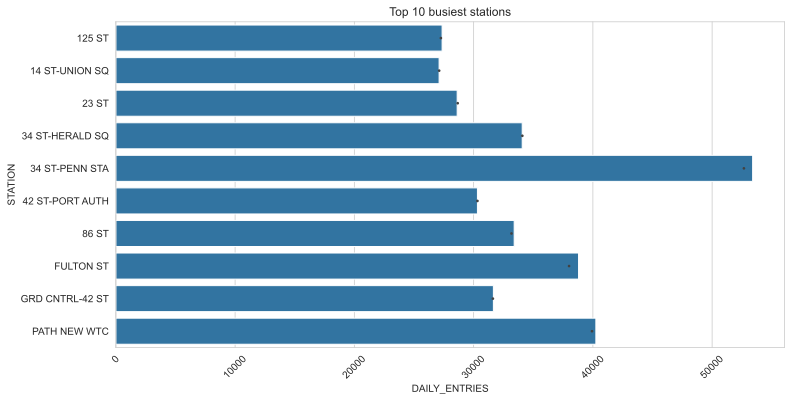

In [113]:
base_color = sns.color_palette()[0]
plt.figure(figsize=(12,6))
sns.barplot(data=stations_daily_top10, x ='DAILY_ENTRIES',y='STATION',ci=0,color=base_color)
plt.xticks(rotation=45)
plt.title('Top 10 busiest stations')
plt.savefig('Top 10 busiest stations.png');

-The figure above represents top 10 busiest stations in NYC.,
-The busiest station in NYC is 34 ST-PENN STA.,
-Staff and volunteers should be placed at the enterances of those staions.

# Find the Busiest Day of the week


In [43]:
turnstiles_daily['MONTH'] = pd.to_datetime(turnstiles_daily['DATE']).dt.month_name()
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,MONTH
1,A002,R051,02-00-00,59 ST,06/13/2021,7586012,06/12/2021,7585759.0,253.0,June
2,A002,R051,02-00-00,59 ST,06/14/2021,7586517,06/13/2021,7586012.0,505.0,June
3,A002,R051,02-00-00,59 ST,06/15/2021,7587126,06/14/2021,7586517.0,609.0,June
4,A002,R051,02-00-00,59 ST,06/16/2021,7587813,06/15/2021,7587126.0,687.0,June
5,A002,R051,02-00-00,59 ST,06/17/2021,7588458,06/16/2021,7587813.0,645.0,June


In [44]:
turnstiles_daily['WEEK'] = pd.to_datetime(turnstiles_daily['DATE']).dt.day_name()
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,MONTH,WEEK
1,A002,R051,02-00-00,59 ST,06/13/2021,7586012,06/12/2021,7585759.0,253.0,June,Sunday
2,A002,R051,02-00-00,59 ST,06/14/2021,7586517,06/13/2021,7586012.0,505.0,June,Monday
3,A002,R051,02-00-00,59 ST,06/15/2021,7587126,06/14/2021,7586517.0,609.0,June,Tuesday
4,A002,R051,02-00-00,59 ST,06/16/2021,7587813,06/15/2021,7587126.0,687.0,June,Wednesday
5,A002,R051,02-00-00,59 ST,06/17/2021,7588458,06/16/2021,7587813.0,645.0,June,Thursday


In [59]:
turnstiles_daily_agg = (turnstiles_daily[['STATION','DATE','DAILY_ENTRIES','WEEK']]
                        .groupby('WEEK')
                        .sum()
                        .sort_values('DAILY_ENTRIES',ascending=False)
                       )
 
turnstiles_daily_agg.reset_index()

,WEEK,DAILY_ENTRIES
0,Friday,28255909.0
1,Tuesday,28102288.0
2,Wednesday,28091942.0
3,Thursday,27685506.0
4,Monday,25633030.0
5,Saturday,19832247.0
6,Sunday,16781304.0


In [62]:
turnstiles_daily_agg_trial = turnstiles_daily_agg.iloc[:]/12

In [63]:
turnstiles_daily_agg_trial

,DAILY_ENTRIES
WEEK,
Friday,2.354659e+06
Tuesday,2.341857e+06
Wednesday,2.340995e+06
Thursday,2.307126e+06
Monday,2.136086e+06
Saturday,1.652687e+06
Sunday,1.398442e+06


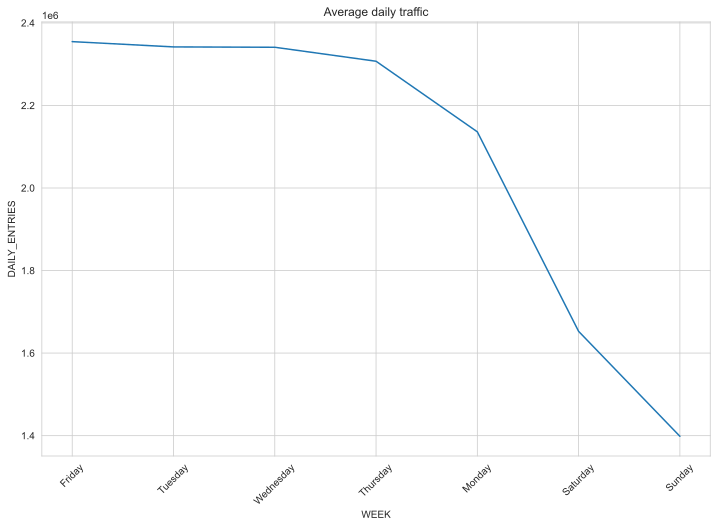

In [111]:
from importlib import reload
reload(plt)
plt.figure(figsize=[12,8])
sns.set_style('whitegrid')
sns.lineplot(x='WEEK', y='DAILY_ENTRIES', data=turnstiles_daily_agg_trial,ci=0, palette=sns.color_palette("BuPu_r"))
plt.xlabel('WEEK')
plt.ylabel('DAILY_ENTRIES')
plt.xticks(rotation=45)
plt.title('Average daily traffic')
plt.savefig('Average daily traffic.png');